# Homework 2 Solutions

In [1]:
import numpy
import scipy.special as s_sp
import scipy.integrate as s_int
import scipy.optimize as s_opt
%matplotlib widget
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import Math

## Question 1

We are asked to compute the size of the comoving horizon at matter-radiation equality for an Einstein-de Sitter (ish) Universe with $z_{\rm eq}=24000\,\Omega_{\rm m,0}\,h^2$. The comoving horizon is given by 

\begin{align}
\chi_{\rm h}(a)&=\int_0^a \frac{c\,da}{a^2\,H(a)}\\
&=\frac{c}{H_0}\int_0^a \frac{da}{a^2\,\sqrt{\Omega_{\rm m,0}a^{-3} + \Omega_{\rm r,0}a^{-4}}}\\
&=\frac{c}{\sqrt{\Omega_{\rm m, 0}}\,H_0}\int_0^a \frac{da}{\sqrt{a + \Omega_{\rm r,0}/\Omega_{\rm m,0}}}\\
&=\frac{c}{\sqrt{\Omega_{\rm m, 0}}\,H_0}\int_0^a \frac{da}{\sqrt{a + a_{\rm eq}}}
\end{align}

(Note: $\Omega_{\rm r,0}/\Omega_{\rm m,0}=a_{\rm eq}=(1+z_{\rm eq})^{-1}=(24000\,\Omega_{\rm m}\,h^2)^{-1}$, where the last equality comes from $z_{\rm eq}=24000\,\Omega_{\rm m,0}\,h^2$ as given in the problem.) This integral is straightforward:

\begin{align}
\chi_{\rm h}(a)&=\frac{c}{\sqrt{\Omega_{\rm m, 0}}\,H_0}\int_0^a \frac{da}{\sqrt{a + a_{\rm eq}}}\\
&= \frac{2\,c}{\sqrt{\Omega_{\rm m, 0}}\,H_0} \sqrt{a+a_{\rm eq}} \bigg|_0^{a_{\rm eq}} \\
&= \frac{2\,c}{\sqrt{\Omega_{\rm m, 0}}\,H_0} \left(\sqrt{2}-1 \right)\,\sqrt{a_{\rm eq}}\\
&= \frac{2\,c}{H_0}\frac{1}{\sqrt{24000\,\Omega_{\rm m,0}^2\,h^2}}\,\left(\sqrt{2}-1 \right)\\
&= \frac{2}{h}\frac{c}{100\,{\rm km\,s^{-1}\,Mpc^{-1}}}\frac{1}{\sqrt{24000\,\Omega_{\rm m,0}^2\,h^2}}\,\left(\sqrt{2}-1 \right)\\
&=C\,(\Omega_{\rm m,0}\,h^2)^{-1}\left(\sqrt{2}-1 \right)\,.
\end{align}
Let's evaluate C:

In [2]:
d_hub=3e5/100
# c=3e5 km/s, H/h=100 km/s/Mpc
coeffic=d_hub*2/(24000**0.5)
print(f'C={coeffic:.0f} Mpc')

C=39 Mpc


\#nailedIt

## Question 2

We are asked to compute $H(a)\,t(a)$ for a standard $\Lambda$CDM cosmology ($h=0.7$, $\Omega_{\rm m,0}=1-\Omega_{\Lambda, 0}=0.3$, $\Omega_{\rm r,0}=\Omega_{\rm m,0}/3400$.

The Hubble parameter is given by 
$$H(a)^2=H_0^2\left(\Omega_{\rm m, 0}a^{-3}+\Omega_{\rm r, 0}a^{-4}+\Omega_{\Lambda,0}\right)$$ and the age $t(a)$ is 
$$t(a)=\int_0^a \frac{da}{a\,H(a)}\,.$$ This is straightforward to set up:

In [3]:
# define Hubble parameter, in km/s/Mpc:
def hub(aa, om0=0.3, ol0=0.7, or0=0.3/3400, h0=0.7):
    return 100*h0*numpy.sqrt(om0*aa**-3 + ol0 + or0*aa**-4)

# set up integral for time:
def t_int(aa):
    return 1/(aa*hub(aa))

# define a function that does the integral (as a function of the upper limit, a_max)
def do_t_int(a_max):
    return s_int.quad_vec(t_int, 0, a_max)

# vectorized version of the integral to avoid a for-loop:
vec_int=numpy.vectorize(do_t_int)

# use 500 integration points
avals=logspace(-6, 3, 1000)
tvals=vec_int(avals)

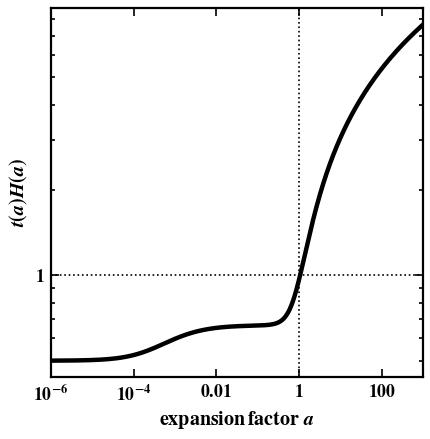

In [4]:
# plot result:
plt.loglog(avals, tvals[0]*hub(avals), 'k-', lw=4)
plt.xlim(avals.min(), avals.max())
plt.xlabel(r'${\rm expansion\,factor\,}\,a$')
plt.ylabel(r'$t(a)H(a)$')
plt.loglog([avals.min(), avals.max()], [1,1], 'k:')
ymin, ymax=plt.ylim()
plt.loglog([1,1], [ymin, ymax], 'k:')
plt.ylim(ymin, ymax)
show()

What do we see? Well, for $a\lesssim 1$, there's not much change in $t(a)\,H(a)$ over the scale factor range $(10^{-6},1)$. Then, from $a \approx 0.5-100$, there's an enormous change. 

What's going on? Well, if a single component dominates the energy density of the Universe and scales as $\rho \propto a^{-n}$, then the Hubble parameter will scale as $H \propto a^{n/2}$, the integrand in the $t\,H$ integral scales as $a^{-n/2-1}$, and therefore the integrand scales as $a^{-n/2}$ -- i.e., the integral will be inversely proportional to $H(a)$, so the combination $t(a)\,H(a)$ will be constant. We see this in the plot: for both matter and radiation domination, $t(a)\,H(a)$ is essentially constant, with a period of transition between the two. 

When we transition from matter to dark energy domination, however, the Hubble parameter does not scale as a power law. It becomes a constant, the integral scales as $\ln(a)$, and so $t(a)\,H(a) \propto \ln(a)$. We see this reflected in the plot. 

The other point is that $1/H0=14.3\,{\rm Gyr}$ today, which is very close to the actual age of the Universe ($13.8~{\rm Gyr}$). Let's evaluate at $a=1$ explicitly:

In [5]:
t0h0=do_t_int(1)[0]*hub(1)
print(f'H0*t0={t0h0:.2f}')

H0*t0=0.96


This is stunningly close, and we can see the that's an accident (or coincidence) for most of the Universe's history, $t(a)\,H(a) \approx 0.4-0.6$; in the future, $t(a)H(a)$ will be moving further and further from $1$. Guess we're just lucky!

## Question 3

We are given that the free-streaming distance is given by 
\begin{align}
d_{\rm fs}(t)&=\int_0^t \,\frac{v(t)}{a(t)}\,dt\,\;\;{\rm so}\\
d_{\rm fs}(a)&=\int_0^a \,\frac{v(a)}{a^2\,H(a)}\,da
\end{align}
We are also given how the velocity depends on $a$:
$v=c$ for $a<a_{\rm nr}$ and $v \propto 1/a$ for $a>a_{\rm nr}$. Continuity at $a_{\rm nr}$ demands that the constant of proportionality in the non-relativistic regime is given by 
$$v=\frac{c}{(a/a_{\rm nr})}\;\;\;\;[a>a_{\rm nr}]\;.$$
$a_{\rm nr}$ is given by $k\,T(a_{\rm nr})=mc^2$, with $k\,T(a)=2.3\times 10^{-4}\,a^{-1}\,{\rm eV}$ (i.e., $T(a)=T_0\,a^{-1}$ with $T_0=2.73$ K). This means that we can get $a_{\rm nr}$:

In [6]:
a_nr=2.3e-4/1e3
print(f'a_nr={a_nr:.2e}')

a_nr=2.30e-07


so the scale factor when the 1 keV sterile neutrino goes non-relativistic is $a_{\rm nr}=2.3\times 10^{-7}$, or a redshift of $z_{\rm nr}=1/a_{\rm nr}=4.3 \times 10^{6}$. We need to split the integral into 2 parts, one from $a=0$ to $a=a_{\rm nr}$ and the other from $a_{\rm nr}$ to $a=1$:
$$
d_{\rm fs}(a=1)=\int_0^{a_{\rm nr}} \,\frac{c}{a^2\,H(a)}\,da + \int_{a_{\rm nr}}^1 \,\frac{c\,a_{\rm nr}}{a^3\,H(a)}\,da
$$

In [7]:
h0=0.7
om=0.3
# redshift of matter-radiation equality:
omor=24000*om*h0**2
# omega_rad at z=0:
om_r=om/omor

# rho_crit at z=0, in h^2 M_sun/Mpc^3:
rho_crit0=2.78e11

def int_fs(a):
    return 1/a**3/((om-om_r)*a**-3+(1.-om)+om_r*a**-4)**0.5

def int_fs_rel(a):
    return 1/a**2/((om-om_r)*a**-3+(1.-om)+om_r*a**-4)**0.5


# note: 3e3/h0 = c/H0 in Gpc
# 


from scipy.integrate import quad
# these integrals give comoving freestreaming scale before it becomes
# non-relativistic (fs1) and after it becomes non-relativistic (fs2)
fs1=3e3*quad(int_fs_rel, 0, a_nr)[0]/h0
fs2=3e3*quad(int_fs, a_nr, 1)[0]*a_nr/h0

# from z=10^9 to z_nr:
aexp1=logspace(-9, log10(a_nr))
# from z_nr to z=0:
aexp2=logspace(log10(a_nr), 0)

fsvals=numpy.zeros(aexp1.size*2)

for i in range(aexp1.size):
    fsvals[i]=3e3*quad(int_fs_rel, 0, aexp1[i])[0]/h0

for i in range(aexp2.size):
    fsvals[aexp1.size + i]=3e3*quad(int_fs, a_nr, aexp2[i])[0]*a_nr/h0 + fs1

# let's also separately get the free-streaming distance at matter-radiation equality:

fs_aeq=fs1+3e3*quad(int_fs, a_nr, 1/omor)[0]*a_nr/h0

# free streaming length at z=0:
fs_z0=fsvals[-1]


print('comoving free-streaming distance: {0:.2f} Mpc\n'.format(fs_z0))
#
print('comoving free-streaming distance by a_nr: {0:.2f} Mpc'.format(fs1))
print('comoving free-streaming distance after a_nr: {0:.2f} Mpc\n'.format(fs2))
# 
print('comoving free-streaming distance by a_eq: {0:.2f} Mpc'.format(fs_aeq))
print('comoving free-streaming distance after a_eq: {0:.2f} Mpc'.format(fs_z0-fs_aeq))


comoving free-streaming distance: 1.01 Mpc

comoving free-streaming distance by a_nr: 0.11 Mpc
comoving free-streaming distance after a_nr: 0.90 Mpc

comoving free-streaming distance by a_eq: 0.83 Mpc
comoving free-streaming distance after a_eq: 0.18 Mpc


We're getting a free-streaming length of $\lambda_{\rm fs} = 1\,{\rm Mpc}$ at $z=0$. Only about 10\% of that free-streaming happens before $a_{\rm nr}$; 83\% happens before $a_{\rm eq}$. So, most of the free-streaming happens in the radiation-dominated era after the particle becomes non-relativistic. To compute the velocity today, we just evaluate the expression we have above for $v(a=1)$: 
$$v(a=1)=c\,\frac{a_{\rm nr}}{a}:$$

In [8]:
print('The free-streaming velocity today is {0:.0f} m/s'.format(3e8*a_nr))

The free-streaming velocity today is 69 m/s


That's pretty small!! 

The mass associated with this free-streaming length is simply 
$$M_{\rm fs}=\frac{4\,\pi}{3}\,\lambda_{\rm fs}^3\,\rho_{\rm m,0}:$$

In [9]:
print('The free-streaming mass  {0:.2e} M_sun'.format(4*pi/3*fs_z0**3*om*rho_crit0*h0**2))

The free-streaming mass  1.77e+11 M_sun


This is a factor of $\sim 5$ less massive than the Milky Way. A full calculation ends up with a somewhat different result: the free-streaming length is a factor of $\sim 7-10$ smaller, and the free-streaming mass is therefore **significantly** smaller. For details, see [Schneider et al. 2012](https://ui.adsabs.harvard.edu/abs/2012MNRAS.424..684S/abstract). Let's also make sure we do the plot:

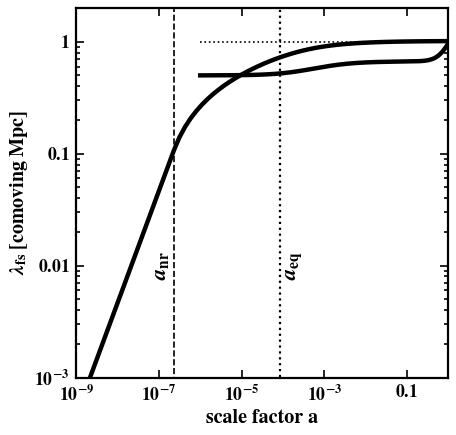

In [10]:
plt.loglog(r_[aexp1, aexp2], fsvals, 'k-', lw=4)
plt.xlabel('scale factor a')
plt.ylabel(r'$\lambda_{\rm fs}\;[{\rm comoving\; Mpc}]$')
plt.plot([a_nr]*2, [1e-4, 2], 'k--', lw=1.5)
plt.plot([om_r]*2, [1e-4, 2], 'k:', lw=2)
plt.ylim(1e-3, 2e0)
plt.xlim(1e-9, 1e0)
plt.text(a_nr/1.2, 1e-2, r'$a_{\rm nr}$', rotation=90, ha='right', va='center', size=20)
plt.text(om_r*1.2, 1e-2, r'$a_{\rm eq}$', rotation=90, ha='left', va='center', size=20)
show()

## Question 4

We know that the Fermi-Dirac distribution function for particles with total energy $E(p)=\sqrt{(cp)^2+(mc^2)^2}$ is 
$$f(p,T)=g\,\frac{1}{e^{\frac{E}{kT}} + 1} \,.$$ As discussed in class (and examined in this problem), neutrinos freeze out when highly relativistic, meaning the distribution function is unchanged and can be taken to be the ultra-relativistic limit of $E=cp$. Therefore, we have $$f=g\,\frac{1}{e^{\frac{cp}{kT}} + 1}\;.$$ 

The number density is $$n(T)=\int_0^{\infty} f(p,T) d^3\left(\frac{p}{2\,\pi\,\hbar}\right)^3=\frac{4\,\pi}{(2\,\pi\,\hbar)^3} g\,\int_0^{\infty} \frac{p^2}{e^{\frac{cp}{kT}} + 1}\,dp \,.$$
From our discussion in class (or an integral table, the interal evaluates to $\frac{3}{4}\,\Gamma(3)\,\zeta(3)$, meaning the number density per flavor as a function of temperature is 
$$n(T_{\nu})=\frac{3\,g_{\nu}}{4\pi^2}\,\zeta(3)\,\left(\frac{kT_{\nu}}{\hbar c} \right)^3 \;.$$ 

The mass density as given in the problem is $\rho_{\nu}(T)=m_{\nu}\,n_{\nu}(T)$ (i.e., the mass density for fully non-relativistic particles). So, we can write that $$\Omega_{\nu,0}=\frac{\rho_{\nu}(T=T_0)}{\rho_{\rm c,0}}=\sum_i m_{\nu,i} \frac{3\,g_{\nu}}{4\pi^2}\,\zeta(3)\,\left(\frac{kT_{\nu, 0}}{\hbar c} \right)^3 \frac{8\,\pi\,G}{3\,H_0^2}\,.$$

We know (or can calculate) that $\rho_{\rm c,0}/c^2=1.05\times 10^{-5}\,h^2\,{\rm GeV\,cm^{-3}}$. We also know that $T_{\nu,0}=(4/11)^{1/3}\,T_{\gamma,0}=(4/11)^{1/3}\,2.7255\,{\rm K}=1.95\,{\rm K}$. Putting this all together, we have that $$\Omega_{\nu,0}\,h^2=A\,\sum_i m_{\nu,i} c^2$$ with $$A=\frac{3\,g_{\nu}}{4\pi^2}\,\zeta(3)\,\left(\frac{k\,1.95\,{\rm K}}{\hbar c} \right)^3\, (1.05\times 10^{-5}\,{\rm GeV\,cm^{-3}})^{-1}\,.$$ Unit-wise, $[kT/\hbar c] \sim {\rm L^{-1}}$, so $[A] \sim {\rm E^{-1}}$, as expected. Whew. Let's evaluate $A$:
             

In [11]:
const_a=3*2/4/numpy.pi**2*s_sp.zeta(3)*(8.617e-5*1.95/197e-7)**3/1.05e4

(in the expression above for ${\rm const\_a}=A$, I've used (1) $\hbar\,c=197 \,{\rm eV \;nm}=197\times 10^{-7}\,{\rm ev \;cm}$, (2) $g_{\nu}=2$ (because we have 1 neutrino and one anti-neutrino per species), and (3) $k=8.617\times 10^{-5}\, {\rm eV\,K^{-1}}$.) If we evaluate $A$ -- or better yet, $1/A$, such that $$\Omega_{\nu,0}\,h^2=\frac{\sum_i m_{\nu,i} c^2}{A^{-1}}\,,$$ we find:

In [12]:
print('1/A  = {0:.0f} eV'.format(1/const_a))

1/A  = 93 eV


In other words, $$\Omega_{\nu,0}\,h^2=\frac{\sum_i m_{\nu,i} c^2}{93\,{\rm eV}}\;.$$ (This is ~1% different from the $94$ eV quoted in the problem because of the approximations made in the expressions for $\hbar\,c$, $k$, and $T_{\nu,0}$.) One way to think of this is that if even one species of neutrino had a mass of order $10~{\rm eV}$, that would be enough to consitute most -- or all -- of the dark matter, since $\omega_{\rm dm,0} = \Omega_{\rm dm, 0}\,h^2\approx 0.12$. (There would be serious issues with this, though, as we'll discuss later.) We know that $\Omega_{\rm tot,0} \sim 1$, so it's clear that $\Omega_{\nu,0}\,h^2 \ll 1$ -- i.e., $\sum_i m_{\nu,i} c^2 \ll 93\,{\rm eV}$. Since $k\,T \approx 1\,{\rm MeV}$ at 1 second, we have $m_{\nu}\,c^2 \ll k\,T$ at neutrino decoupling, and our assumption that neutrinos decouple while relativistic was a good one.

## Question 5

We are given a fine-grained phase space density of 
$$\mathcal{D}_{\rm f}=\frac{d^6M}{d^3x\,d^3v}=g\,m^4\,h^{-3}\,f(p)$$ --- note that 3 powers of the mass come from the original definition of $d^3p=d^3(mv)$ --- 
and a coarse-grained phase space density of 
$$\mathcal{D}_{\rm c}=\frac{\Delta M}{(\Delta x)^3\,(\Delta v)^3}=\frac{\rho_0}{(2\,\pi\,\sigma_0^2)^{3/2}}\,\;.$$
The problem notes that the fine-grained phase space density must always be at least as large as the coarse-grained phase space density (basically, "mixing" can only dilute the phase space density, i.e., $$\mathcal{D}_{\rm f} \ge \mathcal{D}_{\rm c}\,.$$ Thus, we have an inequality:
$$g\,m^4\,h^{-3}\,f(p) \ge \frac{\rho_0}{(2\,\pi\,\sigma_0^2)^{3/2}}\,.$$
The phase space distribution function for fermions at a given temperature is $f(p|T)=[\exp(E(p)/kT)+1]^{-1}$. In general this will be a complicated expression, but we are only trying to get bounds, so we want to evaluate the limits of this function. In particular, $f(p|T)$ is monotonically decreasing function of momentum, as evaluating at $E=p=0$ gives $f=1/2$, and all other values of E will give smaller values of $f$. This means $f(p)$ has a maximum value of $1/2$, so we can replace $f(p)$ in our inequality with $1/2$ and the inequality remains true (the coarse-grained density will always be no larger than the maximum fine-grained density). Thus, 
$$
\frac{1}{2}\,g\,m^4\,h^{-3} \ge \frac{\rho_0}{(2\,\pi\,\sigma_0^2)^{3/2}}\,
$$ 
Solving for $m$, we get
\begin{equation*}
m \ge \left[\frac{2\,\rho_0\,h^3}{g\,(2\,\pi\,\sigma_0^2)^{3/2}} \right]^{1/4}\,.\label{eq:psd} \tag{1}
\end{equation*}
(For *food for thought*: if we'd instead used the Pauli exclusion principle, we'd have used $f_{\rm max}=1$ rather than $1/2$ and the $2$ in the numerator on the right-hand side of Eq. \ref{eq:psd} would be a $1$ instead. The constraint would therefore be weaker (smaller) by a factor of $2^{1/4}$ if we had used the Pauli exclusion principle in our reasoning.)

Next, we want to figure out what this bound implies for $\rho_0$, assuming $m=1\,{\rm keV}$. In that case, we have that
$$
\rho_0 \le \frac{1}{2}\,g\,m^4\,h^{-3}\,(2\,\pi\,\sigma_0^2)^{3/2}\,\,.
$$
To do this, it will be easiest to use $\hbar\,c=197\,{\rm eV\,nm}=0.197\,{\rm keV\,nm}$, so let's multiply and divide by $c^6$:
$$
\rho_0 \le \frac{1}{2}\,g\,m^4\,c^6\,\left(\frac{1}{2\,\pi\,\hbar\,c}\right)^{3}\,\left[2\,\pi\,\left(\frac{\sigma_0}{c}\right)^2\right]^{3/2}\,\,.$$
Evaluating with $g=2$, we get:


In [13]:
rhoc2=(1/2/pi/0.197)**3*(2*pi*(10/3e5)**2)**(3./2)
print(f'rho c^2 = {rhoc2:.2e} keV/nm^3')

rho c^2 = 3.08e-13 keV/nm^3


this is ... not very meaningful. Let's convert to Msun/kpc^3, as requested:

In [14]:
kev_in_gev=1e6
gev_in_msun=10**57
nm_in_m=1e9
m_in_kpc=3.086e19
rho_msunkpc3=rhoc2/kev_in_gev/gev_in_msun*(nm_in_m*m_in_kpc)**3
print(f'rho = {rho_msunkpc3:.2e} Msun/kpc^3')

rho = 9.04e+09 Msun/kpc^3


Now, let's do the required plot. We can use the results we just obtained for $m=1\,{\rm keV}$ and just scale to other masses.

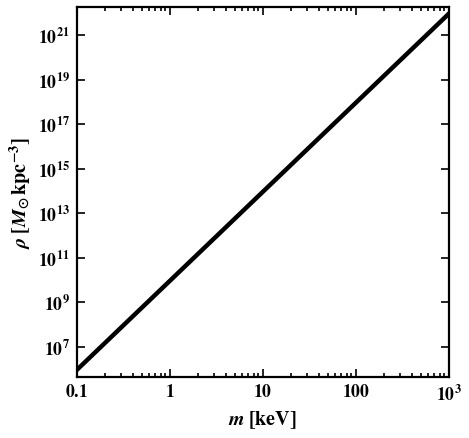

In [15]:
# mass, in keV:
mmin=0.1
mmax=10**3
mvals=logspace(numpy.log10(mmin), numpy.log10(mmax))
# rho, in M_sun/kpc^3
rhovals=rho_msunkpc3*mvals**4
plt.figure()
plt.loglog(mvals, rhovals,  'k-', lw=4)
plt.xlabel(r'$m\;[{\rm keV}]$')
plt.ylabel(r'$\rho\;[M_{\odot}\,{\rm kpc}^{-3}]$')
plt.plot([a_nr]*2, [1e-4, 2], 'k--', lw=1.5)
plt.plot([om_r]*2, [1e-4, 2], 'k:', lw=2)
plt.xlim(mmin, mmax)
plt.ylim(rhovals.min()/2, rhovals.max()*2)
show()

Dwarf galaxies have central densities that can exceed $10^9\,M_{\odot}\,{\rm kpc}^{-3}$; as a result, it's not possible for thermal particles with $m \lesssim 1~{\rm keV}$ to be the entirety of dark matter.